# 3차원 플로팅(Three-Dimensional Plotting)
## 3차원 산점도 그리기

3차원 그래프를 그리기 위해서 from mpl_toolkits.mplot3d import Axes3D를 불러옴

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (9, 9)

xs, ys는 0에서 20 사이, zs는 0에서 50 사이의 값을 갖도록 범위를 정해줌  
color도 0에서 2사이의 값을 갖는 실수이고, 이 값을 통해 각각 다른 색을 표현함

In [32]:
n = 100
xmin, xmax, ymin, ymax, zmin, zmax = 0, 20, 0, 20, 0, 50
cmin, cmax = 0, 2

np.random.random_sample을 이용해 각 범위 안에서의 임의의 실수를 n개 만큼 만듦

In [33]:
xs = np.array([(xmax - xmin) * np.random.random_sample() + xmin for i in range(n)])
ys = np.array([(ymax - ymin) * np.random.random_sample() + ymin for i in range(n)])
zs = np.array([(zmax - zmin) * np.random.random_sample() + zmin for i in range(n)])

color = np.array([(cmax-cmin) * np.random.random_sample() + cmin for i in range(n)])

3D axes를 만들기 위해 add_subplot( )에 projection='3d'키워드를 입력  
scatter( ) 함수에 x, y, z 위치를 array형태로 입력  

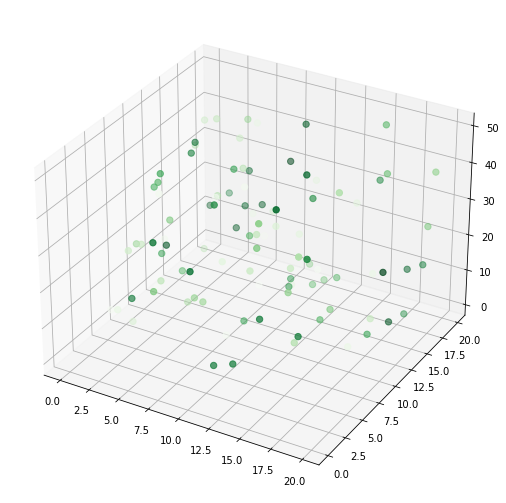

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c=color, marker='o', s=40, cmap='Greens');

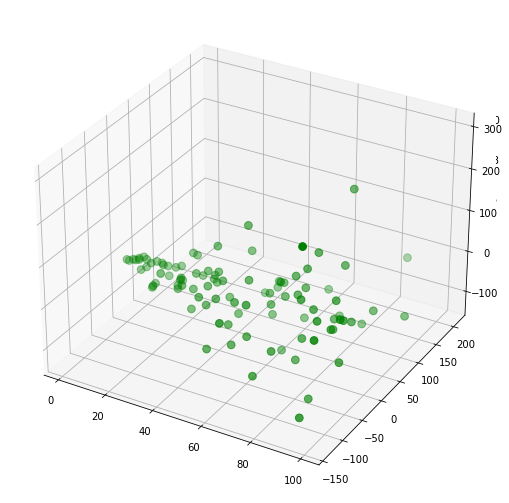

In [37]:
from mpl_toolkits import mplot3d

fig = plt.figure( )
ax = plt.axes(projection='3d')

x = range(1, 101)
y = np.random.randn(100) * x
z = np.random.randn(100) * x

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='green', s=60 );

## 3차원 Surface 표현하기

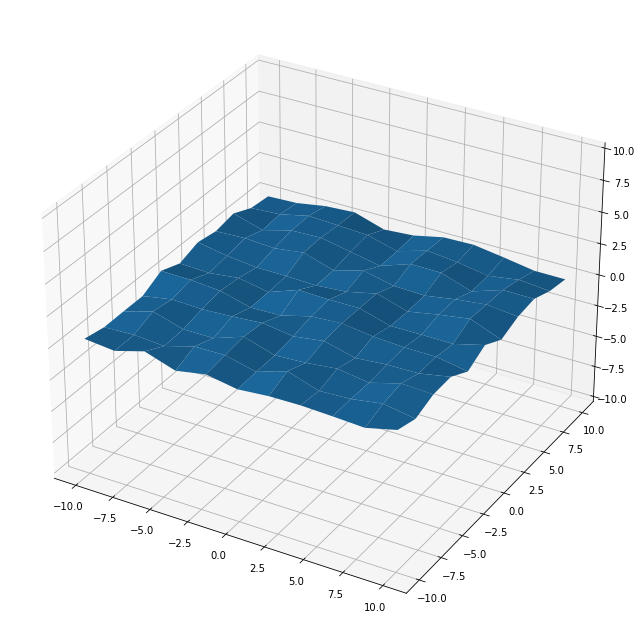

In [38]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-10, 10, 11)
X = np.tile(x, (11, 1))
Y = np.transpose(X)
# X, Y는 -10에서 10 범위에서 11개의 값을 갖도록 만들어진 2차원 array
Z = np.random.rand(11, 11)
# Z는 0에서 1사이의 값을 갖는 2차원 난수 array

ax.plot_surface(X, Y, Z)
ax.set_zlim(-10, 10)

plt.tight_layout();

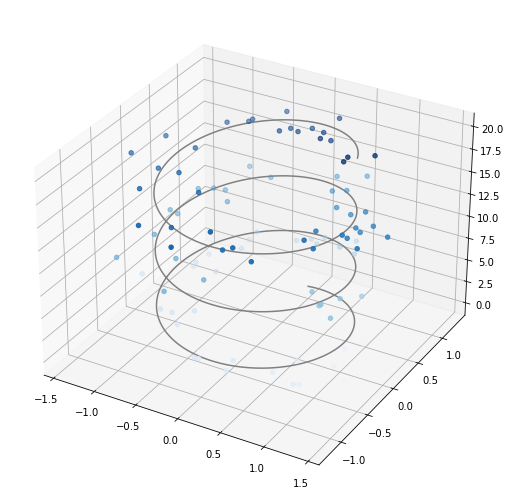

In [40]:
ax = plt.axes(projection='3d')

zlin = np.linspace(0, 20, 1000)
xlin = np.sin(zlin)
ylin = np.cos(zlin)
ax.plot3D(xlin, ylin, zlin, 'gray')

zdata = 20 * np.random.random(100)
xdata = np.sin(zdata) + 0.2 * np.random.randn(100)
ydata = np.cos(zdata) + 0.2 * np.random.randn(100)

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Blues');

In [41]:
def f(x, y):
    return np.cos(np.sqrt(x**2 + y**2))

l = np.linspace(-4, 4, 20)
X, Y = np.meshgrid(l,l)
Z = f(X, Y)

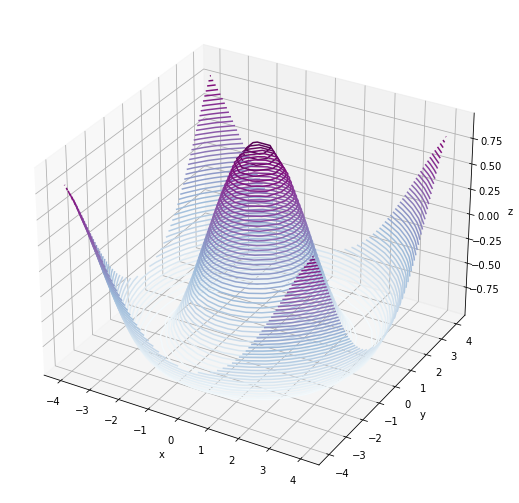

In [42]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='BuPu')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

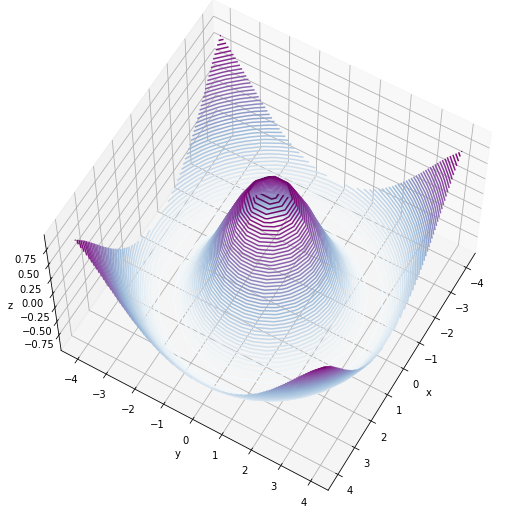

In [43]:
ax.view_init(60, 30)
fig

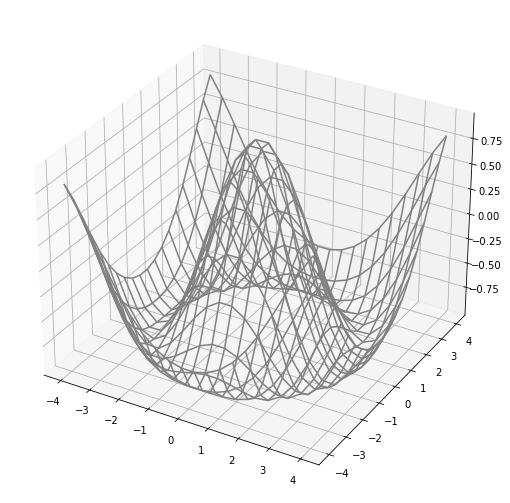

In [44]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='gray');

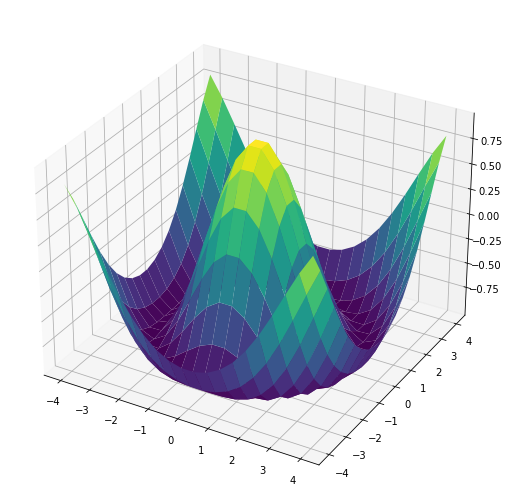

In [45]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

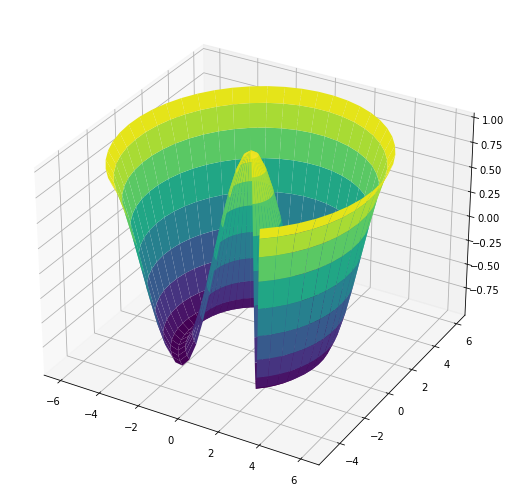

In [46]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.8 * np.pi, 0.8*np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

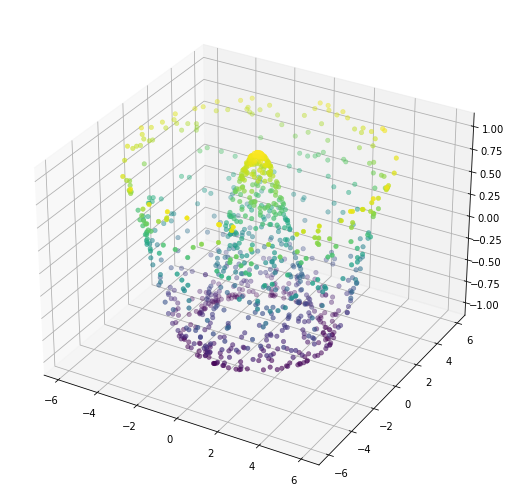

In [47]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
X = np.ravel(r * np.sin(theta))
Y = np.ravel(r * np.cos(theta))
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z, c=Z, cmap='viridis', linewidth=0.5);

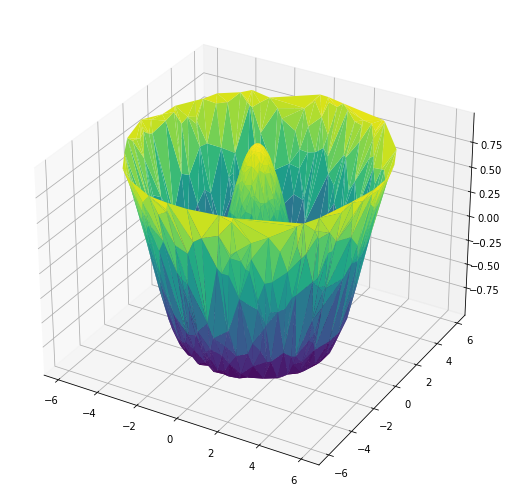

In [48]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(X, Y, Z, cmap='viridis', edgecolor='none');

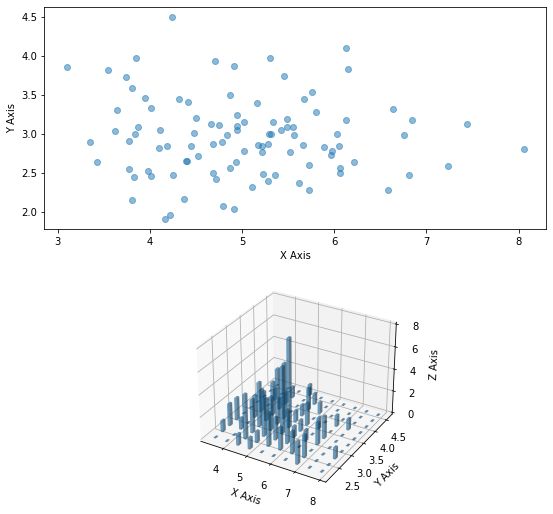

In [53]:
x = np.random.normal(5, 1, 100)
y = np.random.normal(3, 0.5, 100)

fig = plt.figure()
hist, xedges, yedges = np.histogram2d(x, y, bins=10)

element = (len(xedges)-1) * (len(yedges)-1)
xpos, ypos = np.meshgrid(xedges[:-1]+0.25, yedges[:-1]+0.25)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(element)

dx = 0.1 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax = fig.add_subplot(211)
ax.scatter(x, y, alpha=0.5)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

ax2 = fig.add_subplot(212, projection='3d')
ax2.bar3d(xpos, ypos, zpos, dx, dy, dz, alpha=0.4)
ax2.set_xlabel('X Axis')
ax2.set_ylabel('Y Axis')
ax2.set_zlabel('Z Axis');